## Suicide Rate and Socioecomic Indicators by Country

Suicide has become a huge challenge to public mental health in every country. With regard to suicide prevention, it is crucial to identify whether any particular sociodemographic characteristics, such as income inequality, poverty, and unemployment rate, correlate with the high number of suicide rates. The relation between suicide rate and socio-economic indicators are explored in this analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#load the GINI (income inequality) to a data.frame
#in terms of consistency, all column names are transformed into a lower case
gini_latest = pd.read_csv('../../raw_data/economic-inequality-gini-index.csv',
                  names = ['country','country_code','year','gini_coef'],
                  skiprows = 1)
gini_latest

,country,country_code,year,gini_coef
8,Angola,AGO,2008,42.7
4,Albania,ALB,2012,29.0
35,Argentina,ARG,2014,42.7
51,Armenia,ARM,2015,32.4
59,Australia,AUS,2010,34.7
...,...,...,...,...
1039,Samoa,WSM,2008,42.0
1292,Yemen,YEM,2014,36.7
1094,South Africa,ZAF,2011,63.4
1301,Zambia,ZMB,2015,57.1


In [10]:
#load the suicide rate to a data.frame
#in terms of consistency, all column names are transformed into a lower case
suiciderate = pd.read_csv('../../raw_data/crude_suicide_rates.csv',
                         names = ['country','sex','>80','70-79','60-69','50-59','40-49','30-39','20-29','10-19'],
                         skiprows = 1)

#assuming that only workforces that able to gain/receive an income
#we will calculate the suicide rate on working-age only (as each country has a different legal working age, 
#we will select the 20 - 59 years of age)
#need to cleanse the sex column by removing extra spaces
suiciderate = suiciderate.assign(suicide_rate_working_age = lambda x: x['50-59']+x['40-49']+x['30-39']+x['20-29'],
                                 sex = lambda x: x['sex'].str.strip(' '))
suiciderate

,country,sex,>80,70-79,60-69,50-59,40-49,30-39,20-29,10-19,suicide_rate_working_age
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1,31.6
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8,51.2
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2,10.1
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0,29.5
4,Albania,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1,40.0
...,...,...,...,...,...,...,...,...,...,...,...
544,Zambia,Male,152.1,79.0,38.7,27.3,17.0,13.3,12.3,3.9,69.9
545,Zambia,Female,31.2,26.4,16.0,11.2,6.9,4.6,4.2,1.6,26.9
546,Zimbabwe,Both sexes,205.7,81.5,41.3,29.4,19.2,13.7,11.3,4.6,73.6
547,Zimbabwe,Male,285.0,111.5,62.8,47.0,30.1,22.8,19.1,6.4,119.0


In [11]:
#select the total suicide rate (male and female --> both sexes)
#no need to analyze by age at the moment
suiciderate_bothsexes = suiciderate[suiciderate['sex'] == 'Both sexes']
suiciderate_bothsexes

,country,sex,>80,70-79,60-69,50-59,40-49,30-39,20-29,10-19,suicide_rate_working_age
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1,31.6
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0,29.5
6,Algeria,Both sexes,9.4,5.6,4.2,4.1,4.7,5.3,4.2,1.3,18.3
9,Angola,Both sexes,63.5,42.1,23.8,14.8,7.0,5.4,6.6,2.6,33.8
12,Antigua and Barbuda,Both sexes,0.0,0.0,8.1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
534,Venezuela (Bolivarian Republic of),Both sexes,8.9,7.1,5.7,4.6,4.0,4.6,5.4,3.0,18.6
537,Viet Nam,Both sexes,20.9,16.6,14.8,8.3,7.7,10.3,9.0,1.8,35.3
540,Yemen,Both sexes,13.1,9.7,8.3,9.1,12.2,17.5,17.7,4.5,56.5
543,Zambia,Both sexes,79.7,48.9,25.8,18.7,11.8,8.9,8.3,2.8,47.7


In [12]:
#join both data frame for plotting purposes
suiciderate_gini = suiciderate_bothsexes.merge(gini_latest, how = 'inner', on='country')
suiciderate_gini

,country,sex,>80,70-79,60-69,50-59,40-49,30-39,20-29,10-19,suicide_rate_working_age,country_code,year,gini_coef
0,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0,29.5,ALB,2012,29.0
1,Algeria,Both sexes,9.4,5.6,4.2,4.1,4.7,5.3,4.2,1.3,18.3,DZA,2011,27.6
2,Angola,Both sexes,63.5,42.1,23.8,14.8,7.0,5.4,6.6,2.6,33.8,AGO,2008,42.7
3,Argentina,Both sexes,15.8,11.6,10.0,9.5,9.8,10.8,15.3,8.6,45.4,ARG,2014,42.7
4,Armenia,Both sexes,27.9,17.4,10.1,8.4,9.0,5.4,4.5,2.2,27.3,ARM,2015,32.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Uzbekistan,Both sexes,4.8,6.6,7.1,7.5,9.7,9.3,10.6,9.0,37.1,UZB,2003,35.3
136,Vanuatu,Both sexes,31.2,13.1,8.2,5.1,3.8,4.6,8.4,4.4,21.9,VUT,2010,37.3
137,Yemen,Both sexes,13.1,9.7,8.3,9.1,12.2,17.5,17.7,4.5,56.5,YEM,2014,36.7
138,Zambia,Both sexes,79.7,48.9,25.8,18.7,11.8,8.9,8.3,2.8,47.7,ZMB,2015,57.1


<function matplotlib.pyplot.show(close=None, block=None)>

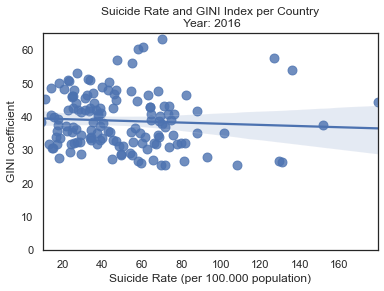

In [14]:
#plotting
sns.set_theme(style='white')

#plot suicide rate with GINI index by country
sns.regplot(data = suiciderate_gini, x = 'suicide_rate_working_age', y = 'gini_coef', scatter_kws={"s": 80})
plt.xlim(10, None)
plt.ylim(0, None)
plt.title('Suicide Rate and GINI Index per Country\n Year: 2016')
plt.xlabel('Suicide Rate (per 100.000 population)')
plt.ylabel('GINI coefficient')

plt.show